## Importing required Libraries

In [2]:
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

**Before starting with the model let's preprocess our data and visualize it**

## Data Analysis

In [3]:
train =  pd.read_csv(r"C:\Users\omkar\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\omkar\Downloads\test.csv")

In [4]:
train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [5]:
test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [6]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [7]:
train.isnull().sum() # cheking for null values

x    0
y    1
dtype: int64

In [8]:
test.isnull().sum() # cheking for null values

x    0
y    0
dtype: int64

## Data Preprocessing

In [9]:
#Drop null values
train = train.dropna()

In [10]:
#Set training data and targets
X_train = train['x']
y_train = train['y']

#Set testing data and targets
X_test = test['x']
y_test = test['y']

In [11]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1,1)

**Now let's scale the data**

**Scaling the data helps our model converge faster**

In [12]:
# Create an instance of the StandardScaler
scaler = StandardScaler()
# Compute the mean and standard deviation of each feature in the training set
scaler.fit(X_train)
# Standardize the training data using the computed mean and standard deviation
X_train = scaler.transform(X_train)
# Apply the same transformation to the testing data to maintain consistenc
X_test = scaler.transform(X_test)
print("Transformation sucessful")

Transformation sucessful


In [13]:
X_train.min(),X_train.max()

(-1.72857469859145, 1.7275858114641094)

## Visualize The Data

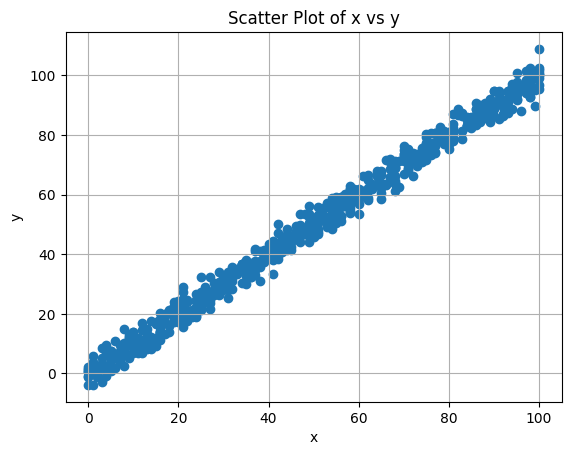

In [14]:
import matplotlib.pyplot as plt

# Assuming train is your DataFrame
plt.scatter(x=train['x'], y=train['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.grid(True)  # Add grid
plt.show()

## Model Selection

In [15]:
model = LinearRegression() #Create linear regression instance

model.fit(X_train, y_train) #fit the linear regression model to the training data and labels

LinearRegression()

## Testing
now lets test the result on the test set

In [16]:
predictions = model.predict(X_test)

In [17]:
predictions

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

In [18]:
# Calculate R-squared (accuracy-like metric for regression)
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, predictions)
print(f"R-squared: {accuracy}")

R-squared: 0.9888014444327563


In [19]:
mse = mean_squared_error(y_test, predictions) 
#Get the mean squared error as the evaluation metric

In [20]:
print(f'the mean squared error is: {mse}')

the mean squared error is: 9.43292219203933
